# Fourier transform of a normal distribution

A normal distribution density is defined as:

\begin{equation}
    g(t) = \frac{1}{\sigma \sqrt{2 \pi}} \, e^{\frac{t^2}{2 \sigma^2}}
\end{equation}

A common way of defining the Fourier Transform and its inverse is:

\begin{gather}
    \mathcal{F}[g(t)] = \tilde{g}(\omega)
                      = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} g(t) \, e^{-i \omega t} dt \\
    \mathcal{F}^{-1}[\tilde{g}(\omega)] = g(t)
                      = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \tilde{g}(\omega) \, e^{+i \omega t} dt
\end{gather}

Another one is:

\begin{gather}
    \mathcal{F}[g(t)] = \tilde{g}(f)
                      = \int_{-\infty}^{\infty} g(t) \, e^{-2 \pi i f t} dt \\
    \mathcal{F}^{-1}[\tilde{g}(f)] = g(t)
                      = \int_{-\infty}^{\infty} \tilde{g}(f) \, e^{+2 \pi i f t} dt
\end{gather}

Both variants are unitary. In the above presentation the symbols $\mathcal{F}$ and $\tilde{}$ have -- somewhat sloppily -- been used for both FT variants though they are in fact different. Thus using this notation one always needs to clarify which version is meant.

In this notebook both variants' effects on the normal distribution are examined.

## Import stuff

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Import functions for making normal distributions
import sys
sys.path.append('../packages/')
from normal_distribution import *

## Define and plot a normal distribution density

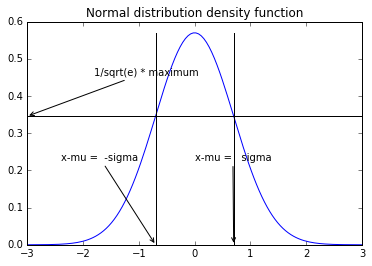

In [5]:
# Define normal distribution parameters
sigma = 0.7    # Width parameter of normal distribution
mu    = 0.     # Center of normal distribution

# Define plot domain
xmin  = -3.
xmax  = 3.
xres  = 128
x     = np.linspace(xmin, xmax, xres)

# Define normal distribution density function and calculate values over plot domain
fct   = make_normal_distribution_density(sigma, mu)
f     = fct(x)
fmax  = fct(mu)

# Plot
plt.plot(x, f)
plt.title('Normal distribution density function')
plt.plot((xmin, xmax), (fmax/np.sqrt(np.e), fmax/np.sqrt(np.e)), 'k-')
plt.annotate('1/sqrt(e) * maximum', xy=(xmin, fmax/np.sqrt(np.e)),
             xycoords='data', xytext=(xmin + 0.2*(xmax-xmin), 0.8*fmax), textcoords='data',
             arrowprops=dict(arrowstyle="->")
             )
plt.plot((sigma, sigma), (0., 1./sigma/np.sqrt(2.*np.pi)), 'k-')
plt.annotate('x-mu =   sigma', xy=(sigma, 0),
             xycoords='data', xytext=(xmin + 0.5*(xmax-xmin), 0.4*fmax), textcoords='data',
             arrowprops=dict(arrowstyle="->")
             )
plt.plot((-sigma, -sigma), (0., 1./sigma/np.sqrt(2.*np.pi)), 'k-')
plt.annotate('x-mu =  -sigma', xy=(-sigma, 0),
             xycoords='data', xytext=(xmin + 0.1*(xmax-xmin), 0.4*fmax), textcoords='data',
             arrowprops=dict(arrowstyle="->")
             )

## Define and plot a normal distribution and its analytical Fourier transforms

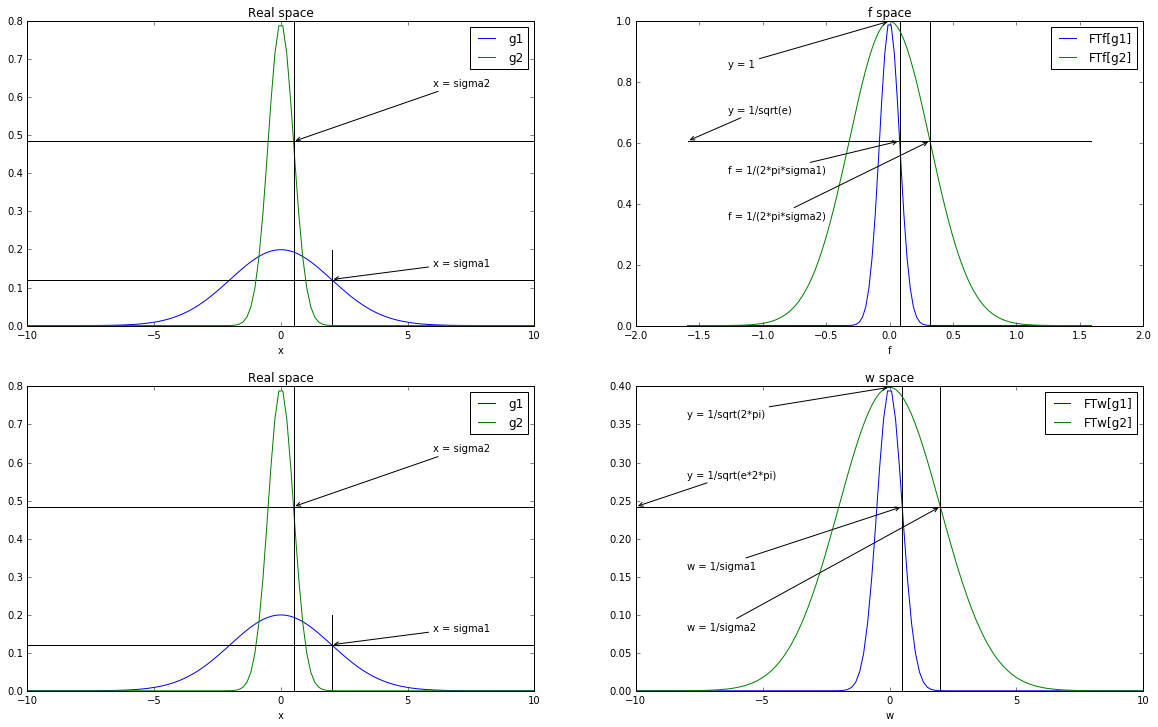

In [4]:
# Define normal distribution parameters
sigma1         = 2.0    # Width parameter of 1st normal distribution
sigma2         = 0.5    # Width parameter of 2nd normal distribution

# Calculate width parameters of Fourier transformed normal distributions, FT version f
sigma1_tilde_f = 1./(2.*np.pi*sigma1)
sigma2_tilde_f = 1./(2.*np.pi*sigma2)

# Calculate width parameters of Fourier transformed normal distributions, FT version w
sigma1_tilde_w = 1./sigma1
sigma2_tilde_w = 1./sigma2

# Define plot resolution and calculate plot domains
xmin           = -5.*np.max((sigma1, sigma2))
xmax           = -xmin
xres           = 128
x              = np.linspace(xmin, xmax, xres)

fmin           = -5.*np.max((sigma1_tilde_f, sigma2_tilde_f))
fmax           = -fmin
fres           = 128
f              = np.linspace(fmin, fmax, fres)

wmin           = -5.*np.max((sigma1_tilde_w, sigma2_tilde_w))
wmax           = -wmin
wres           = 128
w              = np.linspace(wmin, wmax, wres)

# Create normal distribution density functions
fct_g1         = make_normal_distribution_density(sigma1, 0)
fct_g2         = make_normal_distribution_density(sigma2, 0)
fct_g1_tilde_f = make_normal_distribution_density(sigma1_tilde_f, 0, normalize=False)
fct_g2_tilde_f = make_normal_distribution_density(sigma2_tilde_f, 0, normalize=False)
fct_g1_tilde_w = make_normal_distribution_density(sigma1_tilde_w, 0, normalize=False, prefactor=1/(np.sqrt(2.*np.pi)))
fct_g2_tilde_w = make_normal_distribution_density(sigma2_tilde_w, 0, normalize=False, prefactor=1/(np.sqrt(2.*np.pi)))



# Plot
fig = plt.figure(figsize=(20, 12))

sub1 = fig.add_subplot(2, 2, 1)
sub1.plot(x, fct_g1(x), label='g1')
sub1.plot((xmin, xmax), (fct_g1(0)/np.sqrt(np.e), fct_g1(0)/np.sqrt(np.e)), 'k-')
sub1.plot((sigma1, sigma1), (0., fct_g1(0)), 'k-')
sub1.annotate('x = sigma1', xy=(sigma1, fct_g1(0)/np.sqrt(np.e)),
              xycoords='data', xytext=(xmin + 0.8*(xmax-xmin), 1.3*fct_g1(0)/np.sqrt(np.e)),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub1.plot(x, fct_g2(x), label='g2')
sub1.plot((xmin, xmax), (fct_g2(0)/np.sqrt(np.e), fct_g2(0)/np.sqrt(np.e)), 'k-')
sub1.plot((sigma2, sigma2), (0., fct_g2(0)), 'k-')
sub1.annotate('x = sigma2', xy=(sigma2, fct_g2(0)/np.sqrt(np.e)),
              xycoords='data', xytext=(xmin + 0.8*(xmax-xmin), 1.3*fct_g2(0)/np.sqrt(np.e)),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub1.set_title('Real space')
sub1.set_xlabel('x')
sub1.legend()

sub2 = fig.add_subplot(2, 2, 2)
sub2.set_title('f space')
sub2.plot(f, fct_g1_tilde_f(f), label='FTf[g1]')
sub2.plot((sigma1_tilde_f, sigma1_tilde_f), (0., 1.), 'k-')
sub2.annotate('f = 1/(2*pi*sigma1)', xy=(sigma1_tilde_f, 1./np.sqrt(np.e)),
              xycoords='data', xytext=(fmin + 0.1*(fmax-fmin), 0.5),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub2.plot(f, fct_g2_tilde_f(f), label='FTf[g2]')
sub2.plot((sigma2_tilde_f, sigma2_tilde_f), (0., 1.), 'k-')
sub2.annotate('f = 1/(2*pi*sigma2)', xy=(sigma2_tilde_f, 1./np.sqrt(np.e)),
              xycoords='data', xytext=(fmin + 0.1*(fmax-fmin), 0.35),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub2.plot((fmin, fmax), (1./np.sqrt(np.e), 1./np.sqrt(np.e)), 'k-')
sub2.annotate('y = 1/sqrt(e)', xy=(fmin, 1/np.sqrt(np.e)),
             xycoords='data', xytext=(fmin + 0.1*(fmax-fmin), 0.7), textcoords='data',
             arrowprops=dict(arrowstyle="->")
             )
sub2.annotate('y = 1', xy=(0, 1.),
             xycoords='data', xytext=(fmin + 0.1*(fmax-fmin), 0.85), textcoords='data',
             arrowprops=dict(arrowstyle="->")
             )
sub2.set_xlabel('f')
sub2.legend()

sub3 = fig.add_subplot(2, 2, 3)
sub3.plot(x, fct_g1(x), label='g1')
sub3.plot((xmin, xmax), (fct_g1(0)/np.sqrt(np.e), fct_g1(0)/np.sqrt(np.e)), 'k-')
sub3.plot((sigma1, sigma1), (0., fct_g1(0)), 'k-')
sub3.annotate('x = sigma1', xy=(sigma1, fct_g1(0)/np.sqrt(np.e)),
              xycoords='data', xytext=(xmin + 0.8*(xmax-xmin), 1.3*fct_g1(0)/np.sqrt(np.e)),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub3.plot(x, fct_g2(x), label='g2')
sub3.plot((xmin, xmax), (fct_g2(0)/np.sqrt(np.e), fct_g2(0)/np.sqrt(np.e)), 'k-')
sub3.plot((sigma2, sigma2), (0., fct_g2(0)), 'k-')
sub3.annotate('x = sigma2', xy=(sigma2, fct_g2(0)/np.sqrt(np.e)),
              xycoords='data', xytext=(xmin + 0.8*(xmax-xmin), 1.3*fct_g2(0)/np.sqrt(np.e)),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub3.set_title('Real space')
sub3.set_xlabel('x')
sub3.legend()

sub4 = fig.add_subplot(2, 2, 4)
sub4.set_title('w space')
sub4.plot(w, fct_g1_tilde_w(w), label='FTw[g1]')
sub4.plot((sigma1_tilde_w, sigma1_tilde_w), (0., 1./np.sqrt(2.*np.pi)), 'k-')
sub4.annotate('w = 1/sigma1', xy=(sigma1_tilde_w, 1./np.sqrt(2.*np.pi*np.e)),
              xycoords='data', xytext=(wmin + 0.1*(wmax-wmin), 0.16),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub4.plot(w, fct_g2_tilde_w(w), label='FTw[g2]')
sub4.plot((sigma2_tilde_w, sigma2_tilde_w), (0., 1./np.sqrt(2.*np.pi)), 'k-')
sub4.annotate('w = 1/sigma2', xy=(sigma2_tilde_w, 1./np.sqrt(2.*np.pi*np.e)),
              xycoords='data', xytext=(wmin + 0.1*(wmax-wmin), 0.08),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub4.plot((wmin, wmax), (1./np.sqrt(np.e*2.*np.pi), 1./np.sqrt(np.e*2.*np.pi)), 'k-')
sub4.annotate('y = 1/sqrt(e*2*pi)', xy=(wmin, 1/np.sqrt(np.e*2.*np.pi)),
              xycoords='data', xytext=(wmin + 0.1*(wmax-wmin), 0.28),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub4.annotate('y = 1/sqrt(2*pi)', xy=(0, 1/np.sqrt(2.*np.pi)),
              xycoords='data', xytext=(wmin + 0.1*(wmax-wmin), 0.36),
              textcoords='data',
              arrowprops=dict(arrowstyle="->")
              )
sub4.set_xlabel('w')
sub4.legend()
